In [1]:
#load in library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#imported data set
train = pd.read_csv('paris_housing_train.csv')
train.drop(columns=['id','cityCode'], inplace=True) ##id and citycode doesn't contain information

In [3]:
#overview the dataset
print(train)

       squareMeters  numberOfRooms  hasYard  hasPool  floors  cityPartRange  \
0             34291             24        1        0      47              2   
1             95145             60        0        1      60              1   
2             92661             45        1        1      62              4   
3             97184             99        0        0      59              1   
4             61752            100        0        0      57              8   
...             ...            ...      ...      ...     ...            ...   
22725         55825             84        1        0      70              3   
22726         65870             88        1        0      49              9   
22727         93192             42        1        0      39             10   
22728         65797             86        1        0      89              2   
22729         82244             18        1        0      38              1   

       numPrevOwners  made  isNewBuilt  hasStormPro

In [4]:
#Check for nulls
train.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

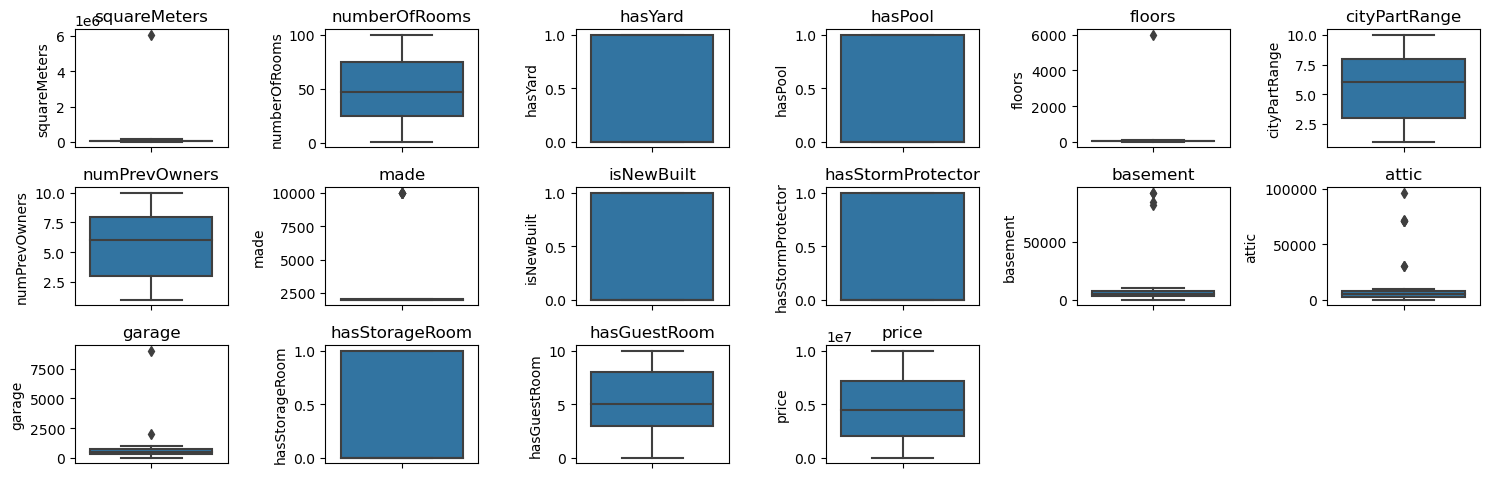

In [5]:
#1st look at boxplot
num_cols = train.columns.to_list()

def box_plot(dataframe, features, rows, cols): 
    fig=plt.figure(figsize=(15,8))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(y=dataframe[feature],data=train)
        ax.set_title(feature,color='black')
    fig.tight_layout()  
    plt.show()

box_plot(train,num_cols,5,6)


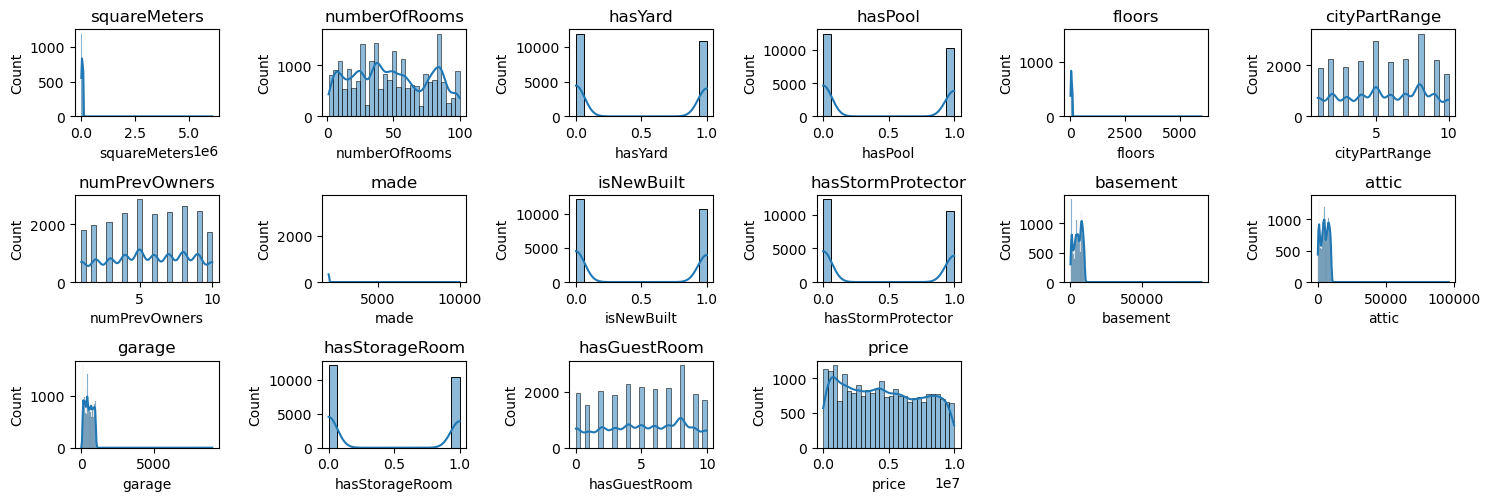

In [6]:
#first look at histogram
def hist_plot(dataframe, features, rows, cols): 
    fig=plt.figure(figsize=(15,8))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.histplot(x=dataframe[feature], fill=True, data=train, kde=True)
        ax.set_title(feature,color='black')
    fig.tight_layout()  
    plt.show()

hist_plot(train,num_cols,5,6)

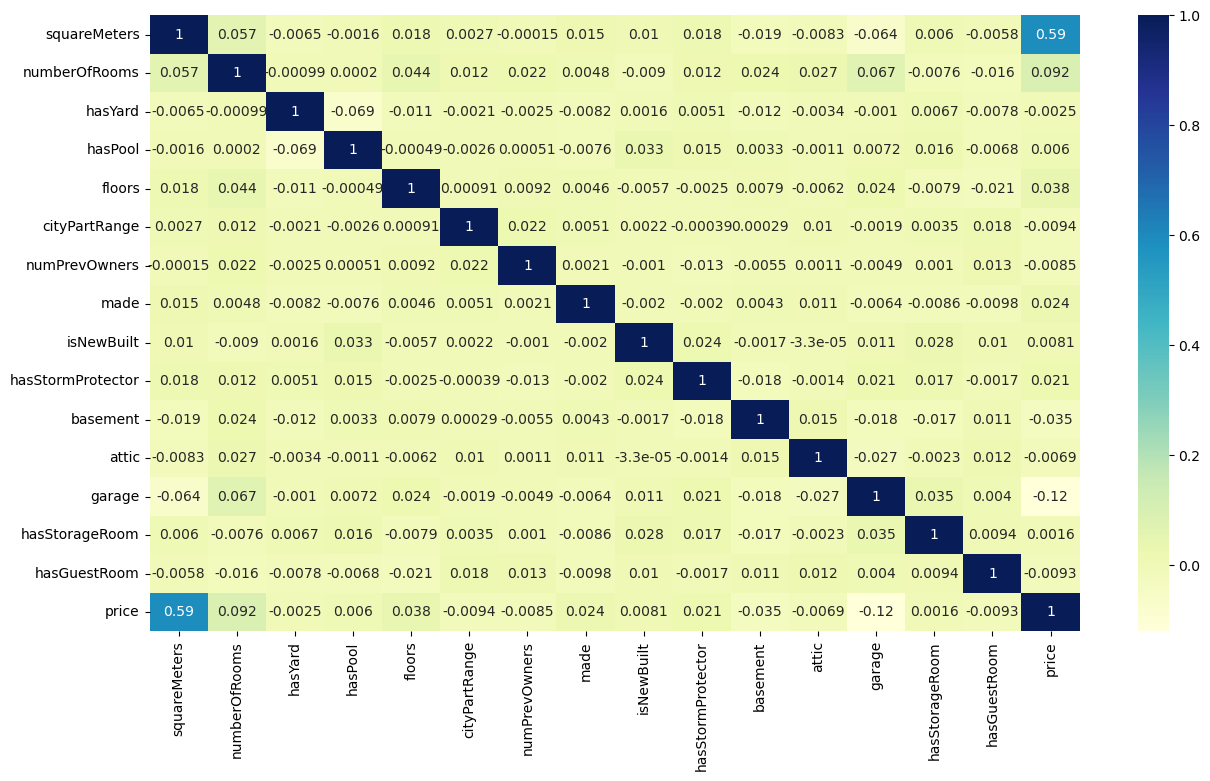

In [10]:
#1st look at the corr
plt.figure(figsize=(15,8))
train_corr = train.corr()
sns.heatmap(train_corr, annot=True, cmap="YlGnBu")
plt.show()

In [11]:
#import sk learn for modelling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [12]:
#take independent variables (all of them)
X = train.drop(['price'], axis =1)
#take dependent variable
y = train['price']

In [13]:
#Divide train dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

train_data = X_train.join(y_train)

array([[<AxesSubplot:title={'center':'squareMeters'}>,
        <AxesSubplot:title={'center':'numberOfRooms'}>,
        <AxesSubplot:title={'center':'hasYard'}>,
        <AxesSubplot:title={'center':'hasPool'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'cityPartRange'}>,
        <AxesSubplot:title={'center':'numPrevOwners'}>,
        <AxesSubplot:title={'center':'made'}>],
       [<AxesSubplot:title={'center':'isNewBuilt'}>,
        <AxesSubplot:title={'center':'hasStormProtector'}>,
        <AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'attic'}>],
       [<AxesSubplot:title={'center':'garage'}>,
        <AxesSubplot:title={'center':'hasStorageRoom'}>,
        <AxesSubplot:title={'center':'hasGuestRoom'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

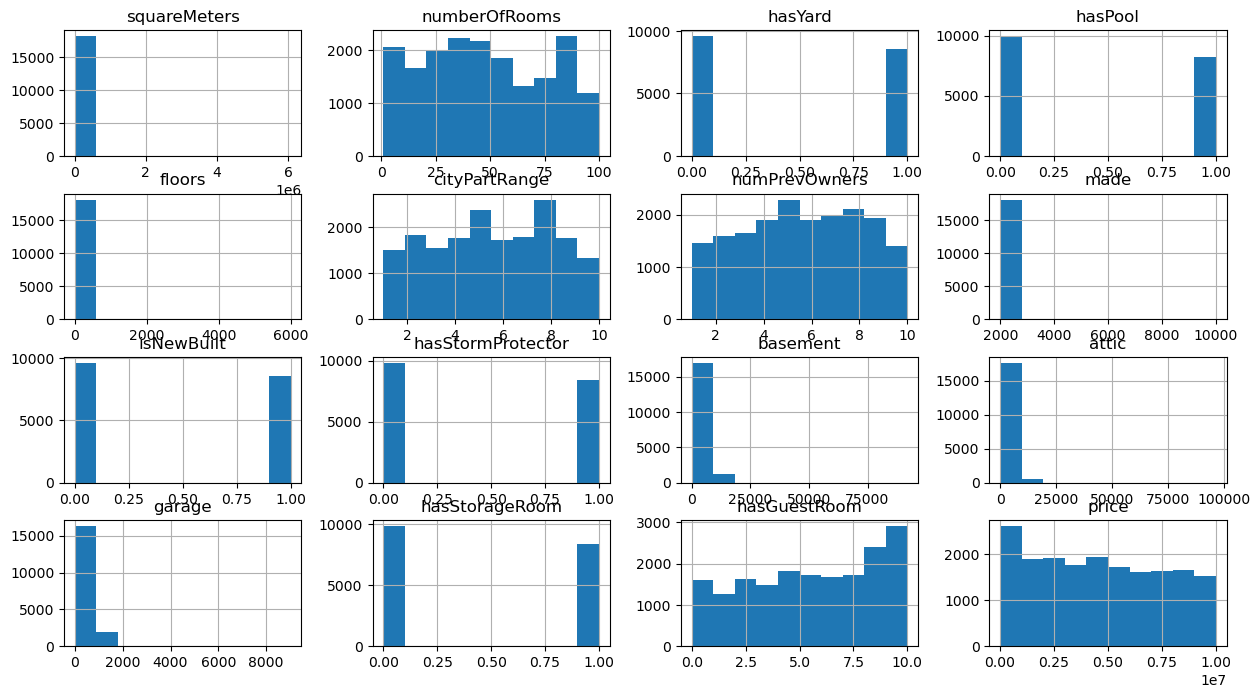

In [15]:
#Check for histogram
train_data.hist(figsize=(15,8))

<AxesSubplot:>

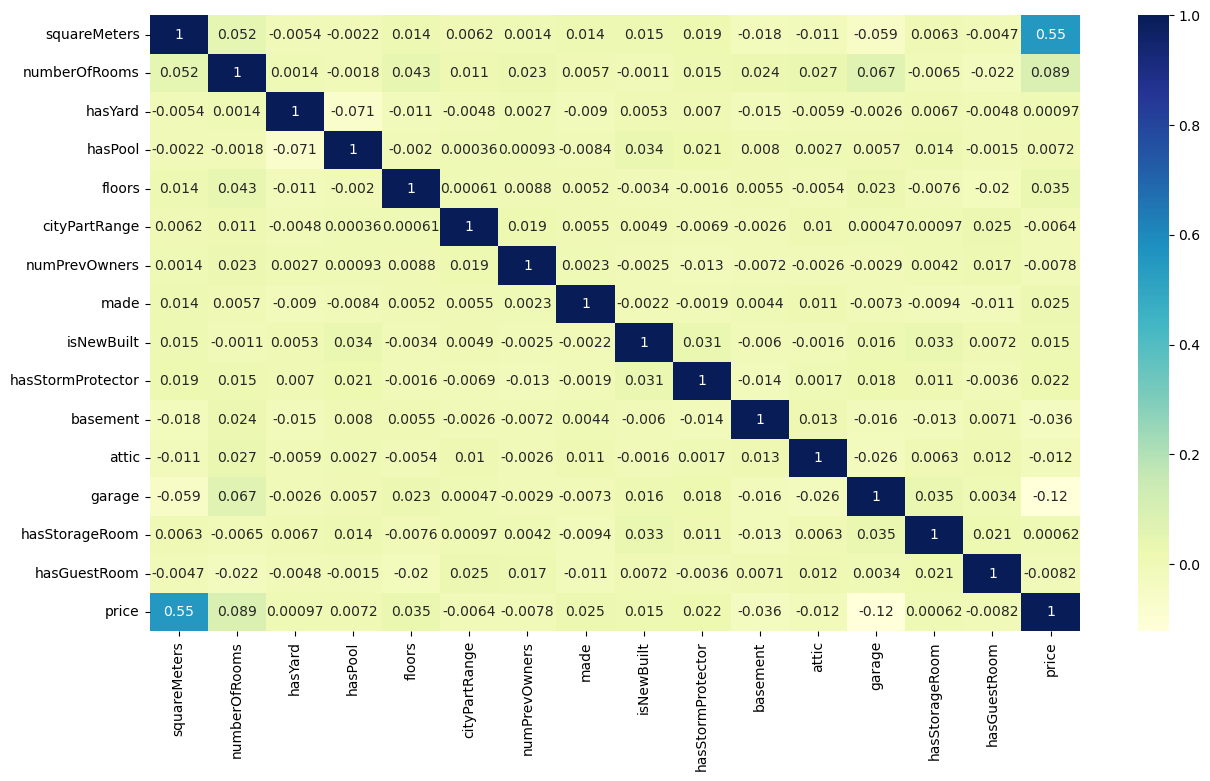

In [16]:
#check for correlation
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [17]:
#normalization data with log function in numpy

train_data['squareMeters']=np.log(train_data['squareMeters']+1)
train_data['numberOfRooms']=np.log(train_data['numberOfRooms']+1)
train_data['floors']=np.log(train_data['floors']+1)
train_data['cityPartRange']=np.log(train_data['cityPartRange']+1)
train_data['numPrevOwners']=np.log(train_data['numPrevOwners']+1)
train_data['made']=np.log(train_data['made']+1)
train_data['basement']=np.log(train_data['basement']+1)
train_data['attic']=np.log(train_data['attic']+1)
train_data['garage']=np.log(train_data['garage']+1)
train_data['hasGuestRoom']=np.log(train_data['hasGuestRoom']+1)


array([[<AxesSubplot:title={'center':'squareMeters'}>,
        <AxesSubplot:title={'center':'numberOfRooms'}>,
        <AxesSubplot:title={'center':'hasYard'}>,
        <AxesSubplot:title={'center':'hasPool'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'cityPartRange'}>,
        <AxesSubplot:title={'center':'numPrevOwners'}>,
        <AxesSubplot:title={'center':'made'}>],
       [<AxesSubplot:title={'center':'isNewBuilt'}>,
        <AxesSubplot:title={'center':'hasStormProtector'}>,
        <AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'attic'}>],
       [<AxesSubplot:title={'center':'garage'}>,
        <AxesSubplot:title={'center':'hasStorageRoom'}>,
        <AxesSubplot:title={'center':'hasGuestRoom'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

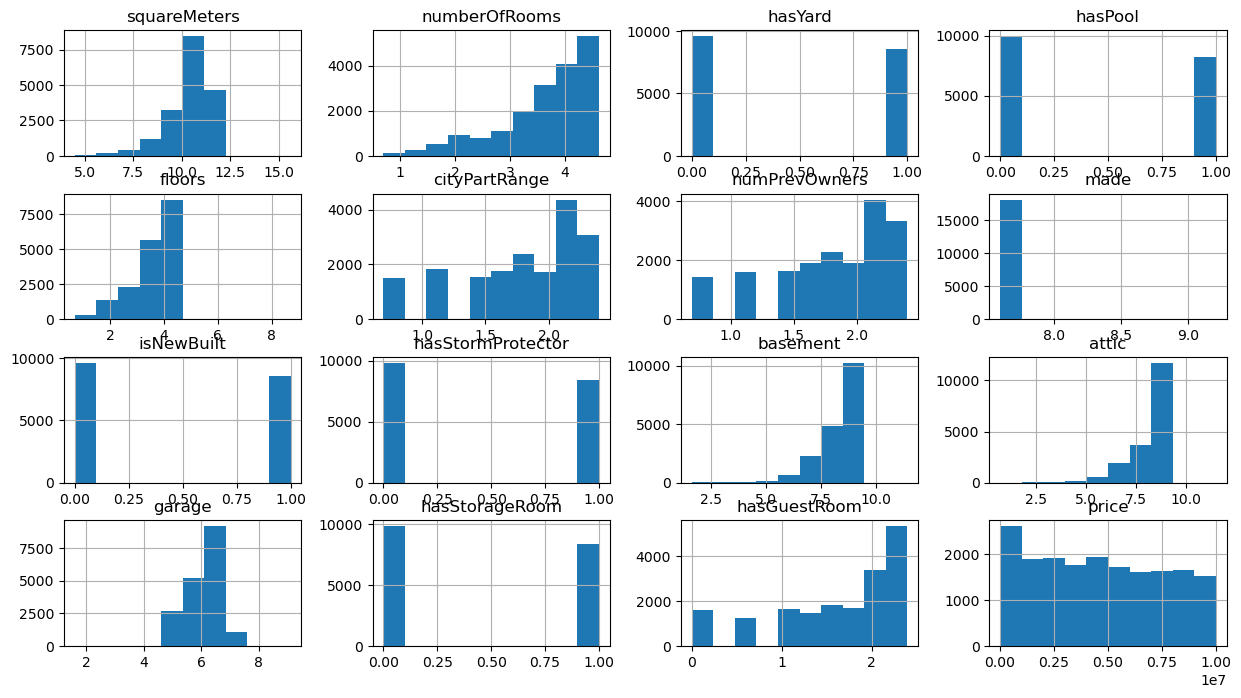

In [18]:
#check data again
train_data.hist(figsize=(15,8))

<AxesSubplot:>

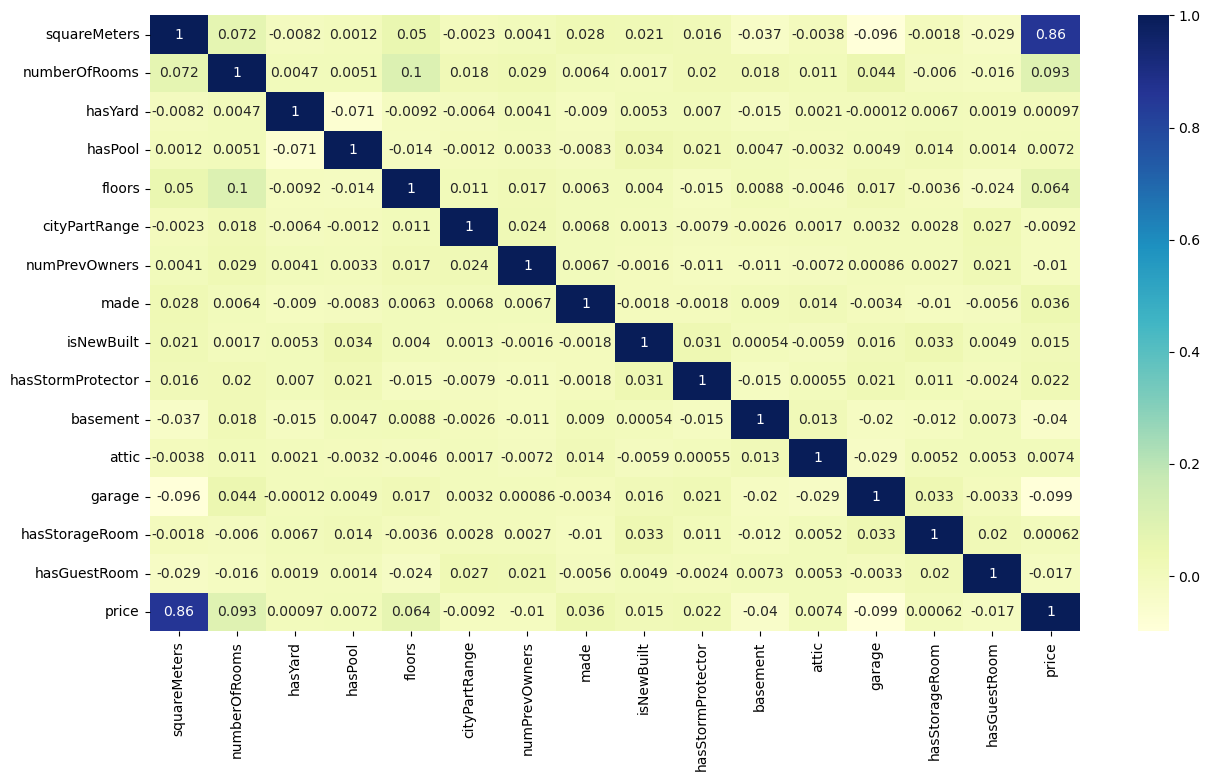

In [19]:
#recheck correlation
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [20]:
#regression model 

x_train, y_train = train_data.drop(['price'], axis = 1), train_data['price']
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [21]:
# test subset

test_data = X_test.join(y_test)

test_data['squareMeters']=np.log(test_data['squareMeters']+1)
test_data['numberOfRooms']=np.log(test_data['numberOfRooms']+1)
test_data['floors']=np.log(test_data['floors']+1)
test_data['cityPartRange']=np.log(test_data['cityPartRange']+1)
test_data['numPrevOwners']=np.log(test_data['numPrevOwners']+1)
test_data['made']=np.log(test_data['made']+1)
test_data['basement']=np.log(test_data['basement']+1)
test_data['attic']=np.log(test_data['attic']+1)
test_data['garage']=np.log(test_data['garage']+1)
test_data['hasStorageRoom']=np.log(test_data['hasStorageRoom']+1)
test_data['hasGuestRoom']=np.log(test_data['hasGuestRoom']+1)

x_test, y_test = test_data.drop(['price'], axis = 1), test_data['price']


In [22]:
#valuation check
reg.score(x_test,y_test)

0.7341097685347969

In [23]:
### 0.7341 we move on to trying random forest

In [24]:
# random forest 2nd model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
#evalution
forest.score(x_test,y_test)

0.994028135080717

In [ ]:
# concluding that randomforest regression provides a better model for predicting housing price.